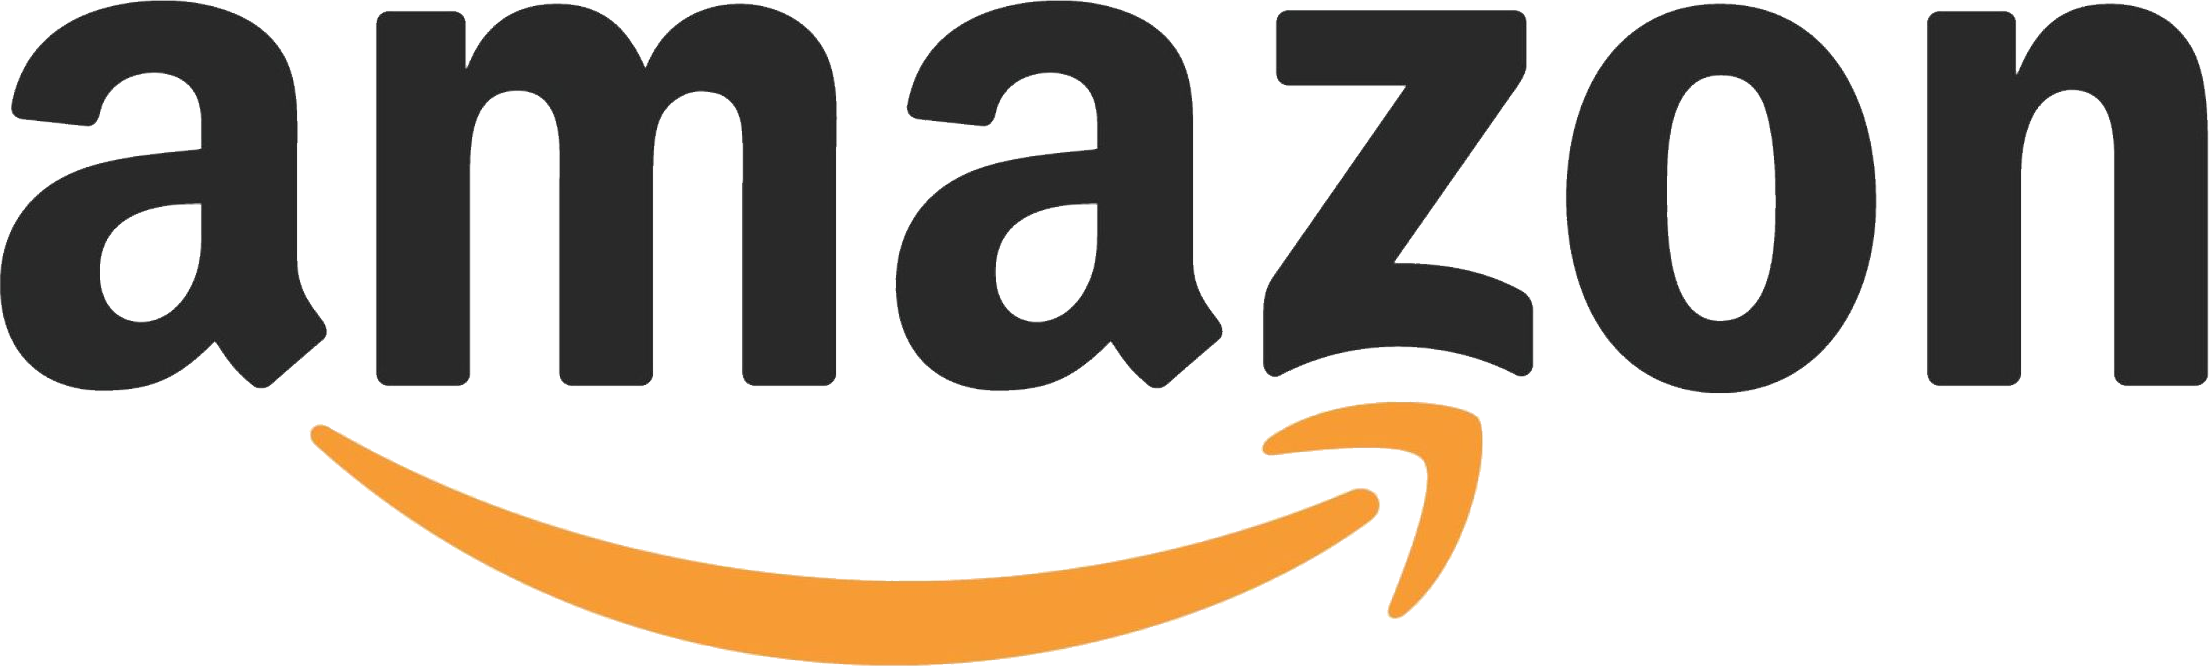

## <p style="text-align:center;">Analyzing Amazon Sales Data</p>

### <p style="text-align:center;">Last Updated - 08-04-2023</p>

# Tabel of Content
#### 1. Objective
#### 2. Data Preparation
#### 3. Data Processing
#### 4. Analyzing and Visualizing
#### 5. Conclusions
#### 6. Recommendations

# Introduction
#### ~ Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.

# 1. Objective
### ~ Identify sales trends on a monthly, yearly, and yearly-monthly basis to reduce costs and increase profits.

#### Actions:

* Collect and organize sales data for the past years.
* Analyze sales data on a monthly and yearly basis to identify patterns and trends.
* Adjust inventory and marketing strategies to take advantage of seasonal trends.
* Analyze sales data to identify opportunities for improvement.
* Top 5 Products segment and their Regions

## 2. Data Preparation

#### 2.1 Data 

* The Amazon sales data set provided by iNeuron contains information on the region and country of the sale, item type, sales channel, order priority and date, order ID, ship date, units sold, unit price, unit cost, total revenue, total cost, and total profit. This data set can be used to analyze sales patterns and trends for Amazon products, as well as to identify opportunities to improve distribution, reduce costs, and increase profitability.

#### 2.2 Dataset 
* This dataset was obtained from iNeuron and contains information related to sales, products, and other relevant factors for our objective.

#### 2.3 Limitations 

* Limited data size: The data set contains only 100 rows of information on different regions and products, which may not be sufficient for certain types of analysis.


* Limited representativeness: As the data set covers only a limited number of regions, countries, item types, and sales channels, it may not be fully representative of the overall market, and could potentially skew any insights drawn from the data.


* Data currency concerns: Depending on the date range covered by the data set, it may not fully reflect current market trends or conditions, which could limit its usefulness for certain types of analysis or decision-making.


### ~ Importing the libraries

In [17]:
# Importing required libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## 3. Data Processing

In [18]:
# Reading the dataset

sales_data = pd.read_csv('./dataset/Amazon Sales Records.csv')
sales_data.head(20)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,02-04-2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,04-23-2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,07-17-2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,07-14-2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,04-18-2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [19]:
# Creating fuction for see overview of all data and all infor at once

def overview_dataset(dataset):
    return dataset.shape, dataset.columns, dataset.info(), dataset.describe(), dataset.isna().sum()

In [20]:
overview_dataset(sales_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


((100, 14),
 Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
        'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
        'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
       dtype='object'),
 None,
            Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
 count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
 mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
 std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
 min    1.146066e+08   124.000000    9.330000    6.920000   4.870260e+03   
 25%    3.389225e+08  2836.250000   81.730000   35.840000   2.687212e+05   
 50%    5.577086e+08  5382.500000  179.880000  107.275000   7.523144e+05   
 75%    7.907551e+08  7369.000000  437.200000  263.330000   2.212045e+06   
 max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06   
 
          Total Cost  Total Profit  
 count  1.000

In [21]:
def displayColumns(dataset):
    columns=list(sales_data.columns)
    return display(pd.DataFrame(columns,columns=["Columns"]))

In [22]:
# Returns shape of the dataset

rows,column=sales_data.shape
print(f"Our Data set contains {rows} rows and {column} columns")

Our Data set contains 100 rows and 14 columns


In [23]:
# Returns the column names of the dataset

displayColumns(sales_data)

,Columns
0,Region
1,Country
2,Item Type
3,Sales Channel
4,Order Priority
5,Order Date
6,Order ID
7,Ship Date
8,Units Sold
9,Unit Price


### 3.1 Data overview Insight

* Here we found that Order Id and Ship Date column dataframe are in object datatype So we have to convert it to Datetime datatype

* It is founded that there are no negative values present in the given dataset

* It is found that there are no null values present in the given dataset

* It is founded that the given dataset contains 100 rows and 14 columns

#### 3.2 Converting date format

In [24]:
# Converting object type to datetime fromat
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

#### 3.3 Spilling month, year and monthly_year from Order Date and Ship Date columns

In [25]:
# Spilliting month, year and yearly_month from base column (Order Date, Ship Date)

sales_data.insert(loc=7, column='Order Year_', value=sales_data['Order Date'].dt.year)
sales_data.insert(loc=8, column='Order Month_', value=sales_data['Order Date'].dt.month)
sales_data.insert(loc = 9, column = 'Order Month Name', value=pd.to_datetime(sales_data['Order Date']).dt.strftime('%B'))
sales_data.insert(loc=10, column='Order Yearly Month_', value=sales_data['Order Date'].dt.to_period('M'))
sales_data.insert(loc=11, column='Ship Year_', value=sales_data['Ship Date'].dt.year)
sales_data.insert(loc=12, column='Ship Month_', value=sales_data['Ship Date'].dt.month)
sales_data.insert(loc = 13, column = 'Ship Month Name', value=pd.to_datetime(sales_data['Ship Date']).dt.strftime('%B'))
sales_data.insert(loc=14, column='Ship Yearly Month_', value=sales_data['Ship Date'].dt.to_period('M'))
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Order Year_,Order Month_,Order Month Name,...,Ship Month_,Ship Month Name,Ship Yearly Month_,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010,5,May,...,6,June,2010-06,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012,8,August,...,9,September,2012-09,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014,5,May,...,5,May,2014-05,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014,6,June,...,7,July,2014-07,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013,2,February,...,2,February,2013-02,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [26]:
print(list(sales_data.columns))
sales_data.columns = sales_data.columns.str.strip()

# Removing Unnecessary Columns
sales_data = sales_data[['Region','Order Month Name','Order Month_', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Year_', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']]
sales_data.head()


['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Order Year_', 'Order Month_', 'Order Month Name', 'Order Yearly Month_', 'Ship Year_', 'Ship Month_', 'Ship Month Name', 'Ship Yearly Month_', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']


,Region,Order Month Name,Order Month_,Item Type,Sales Channel,Order Priority,Order Year_,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,May,5,Baby Food,Offline,H,2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,August,8,Cereal,Online,C,2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,May,5,Office Supplies,Offline,L,2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,June,6,Fruits,Online,C,2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,February,2,Office Supplies,Offline,L,2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [27]:
# Returns all the columns of the dataframe

displayColumns(sales_data)

,Columns
0,Region
1,Order Month Name
2,Order Month_
3,Item Type
4,Sales Channel
5,Order Priority
6,Order Year_
7,Units Sold
8,Unit Price
9,Unit Cost


#### 3.4 New dataframe Shape

In [28]:
# Returns shape of the dataset

rows,column = sales_data.shape
print(f"Our Data set contains {rows} rows and {column} columns")

Our Data set contains 100 rows and 13 columns


#### ~ Summarized Processing tasks

**Here are the some steps we have taken for cleaning and manipulation of data**
* Converted Date format from object to date.
* The "Order Date" is splited into 'Order Year_', 'Order Month_',  'Order Month Name', ''Order Yearly Month_''.
* The "Ship Date" is splited into 'Ship Year_', 'Ship Month_', 'Ship Month Name', 'Ship Yearly Month_'.
* Some Uneccasary columns have been removed :

**Country**, 
**Order Date**, 
**Order Month_**, 
**Order Yearly month_**, 
**Ship Year_**, 
**Ship Yearly Month_**, 
**Ship Date**.

* There are 11 columns after processing.

# 4. Analyzing and Visualizing

In [29]:
# Exporting cleaned data to local machine in order to make visuals on powerbi
sales_data.to_csv('cleaned_sales_data.csv', index=False)

### <p style="text-align:center;">~ Here are the some Insights we have got after analyzing and visualizing on PowerBI ~</p>

   ###                     4.1 Total Yearly Revenue, Profit and Sales by Sales Channel (Online/Offline) (2010-17)

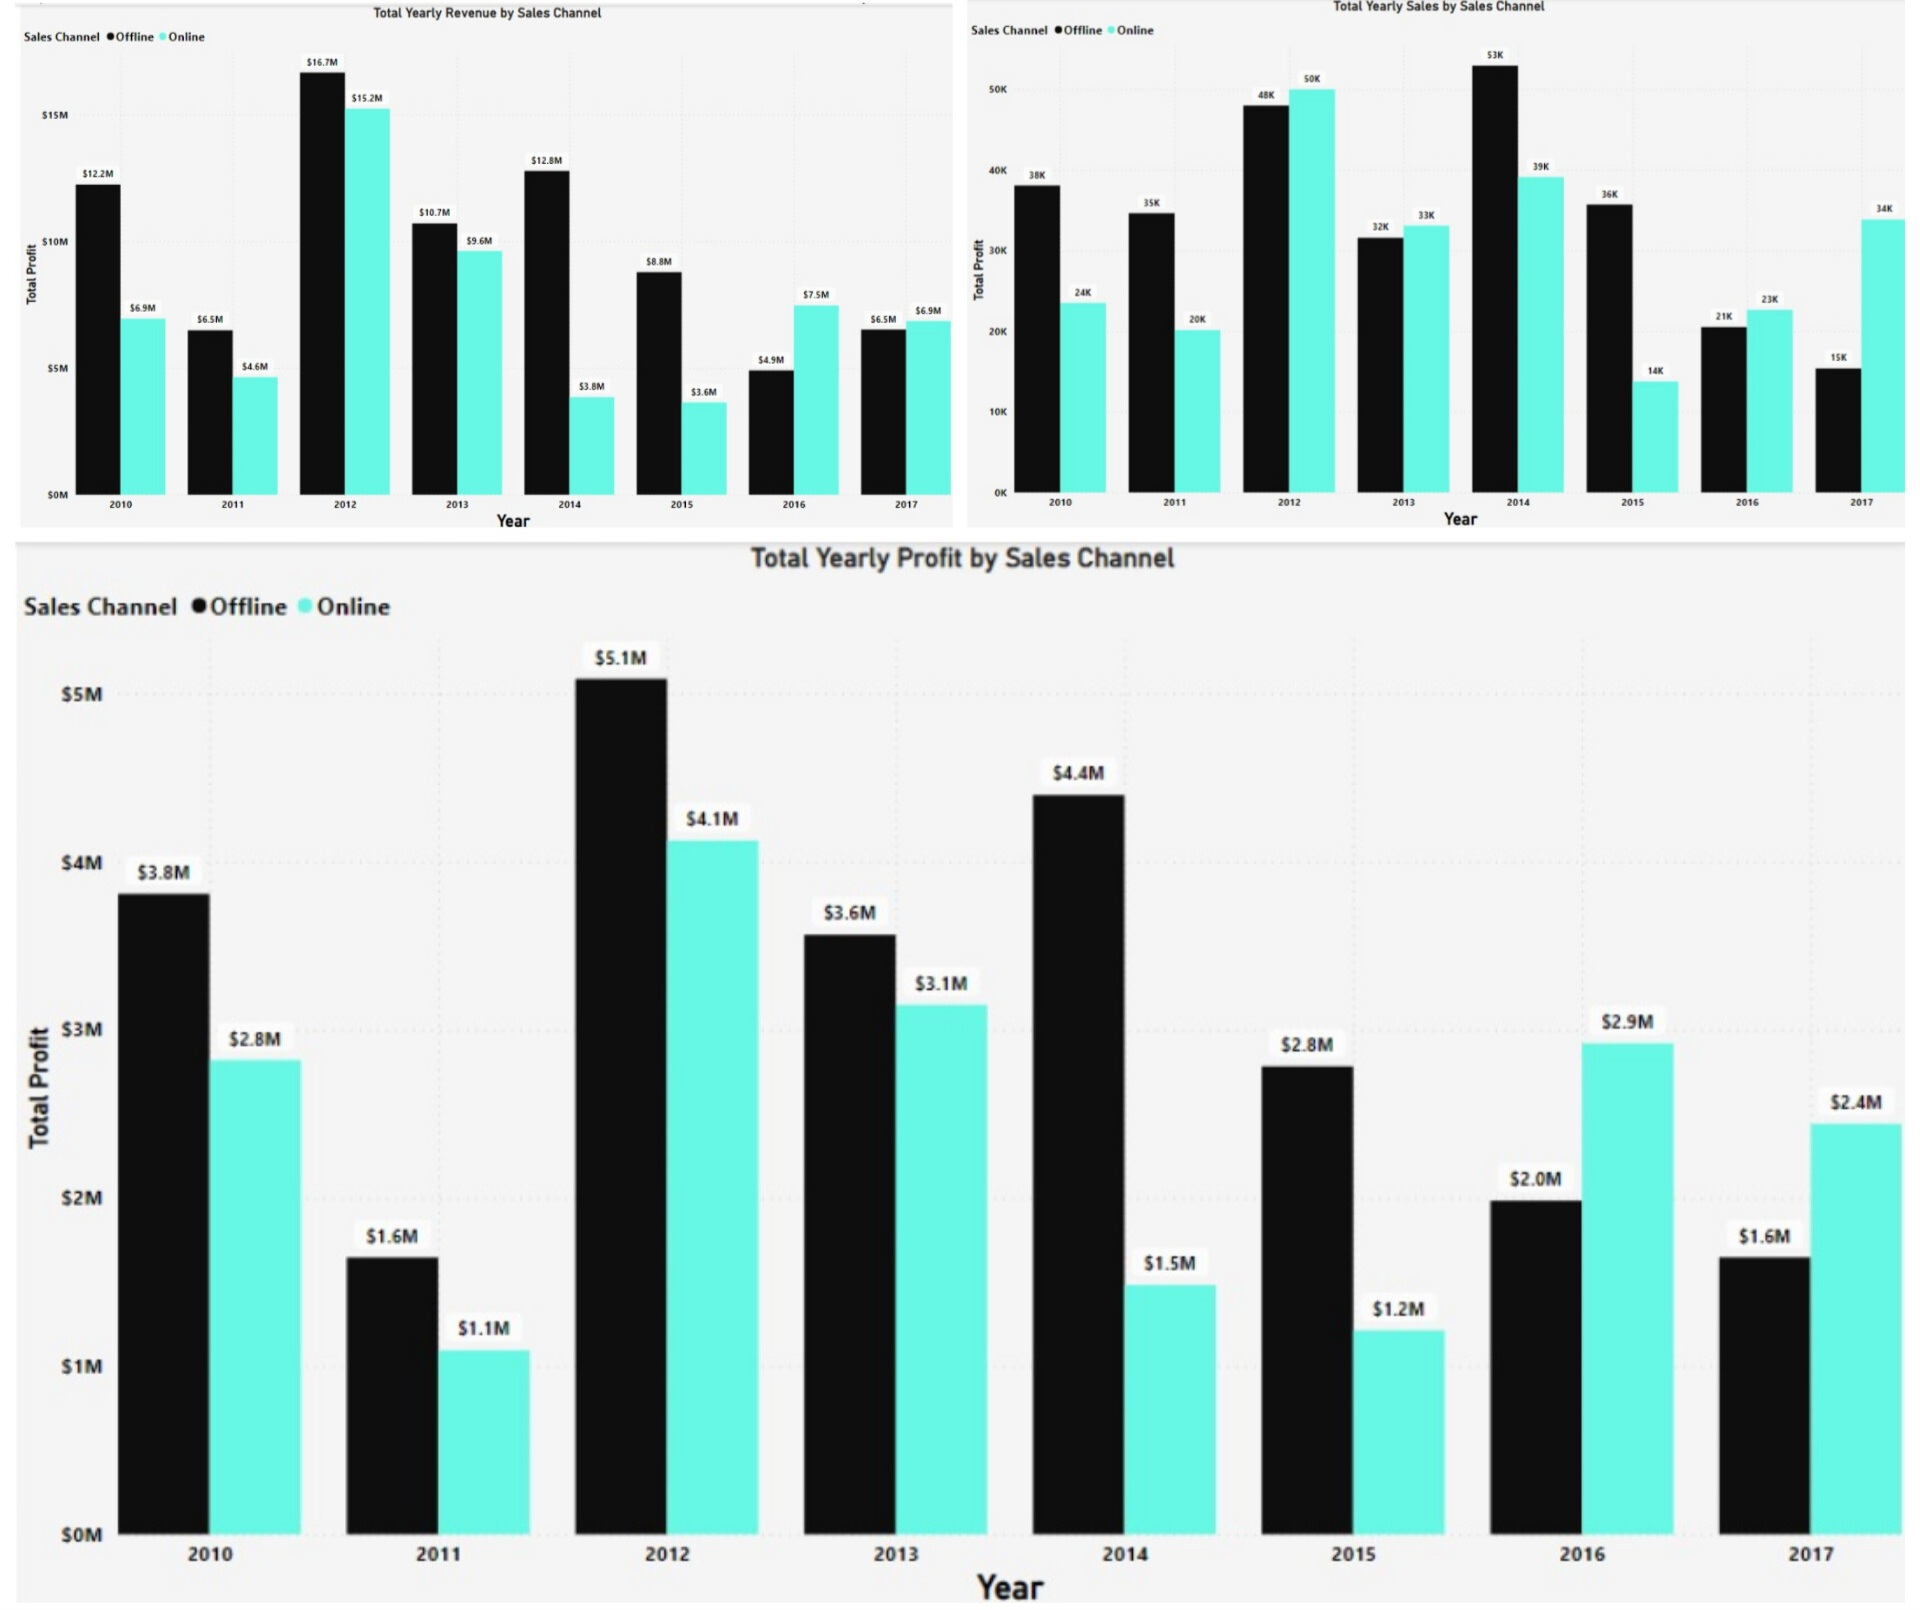

   **~ Insights**

* The majority of our profit, revenue, and sales come from our offline channel.


* "Our highest revenue and profit year was in **2012**, with a total revenue of (**135.2**) million dollar and a profit of (**$9.2**) million."


* From **2010** to **2012**, we experienced an increase in revenue, sales, and profit. However, from **2014** to **2017**, we experienced a decline in these metrics.

### 4.2 Revenue, Profit and Sales by Region (2010-17)

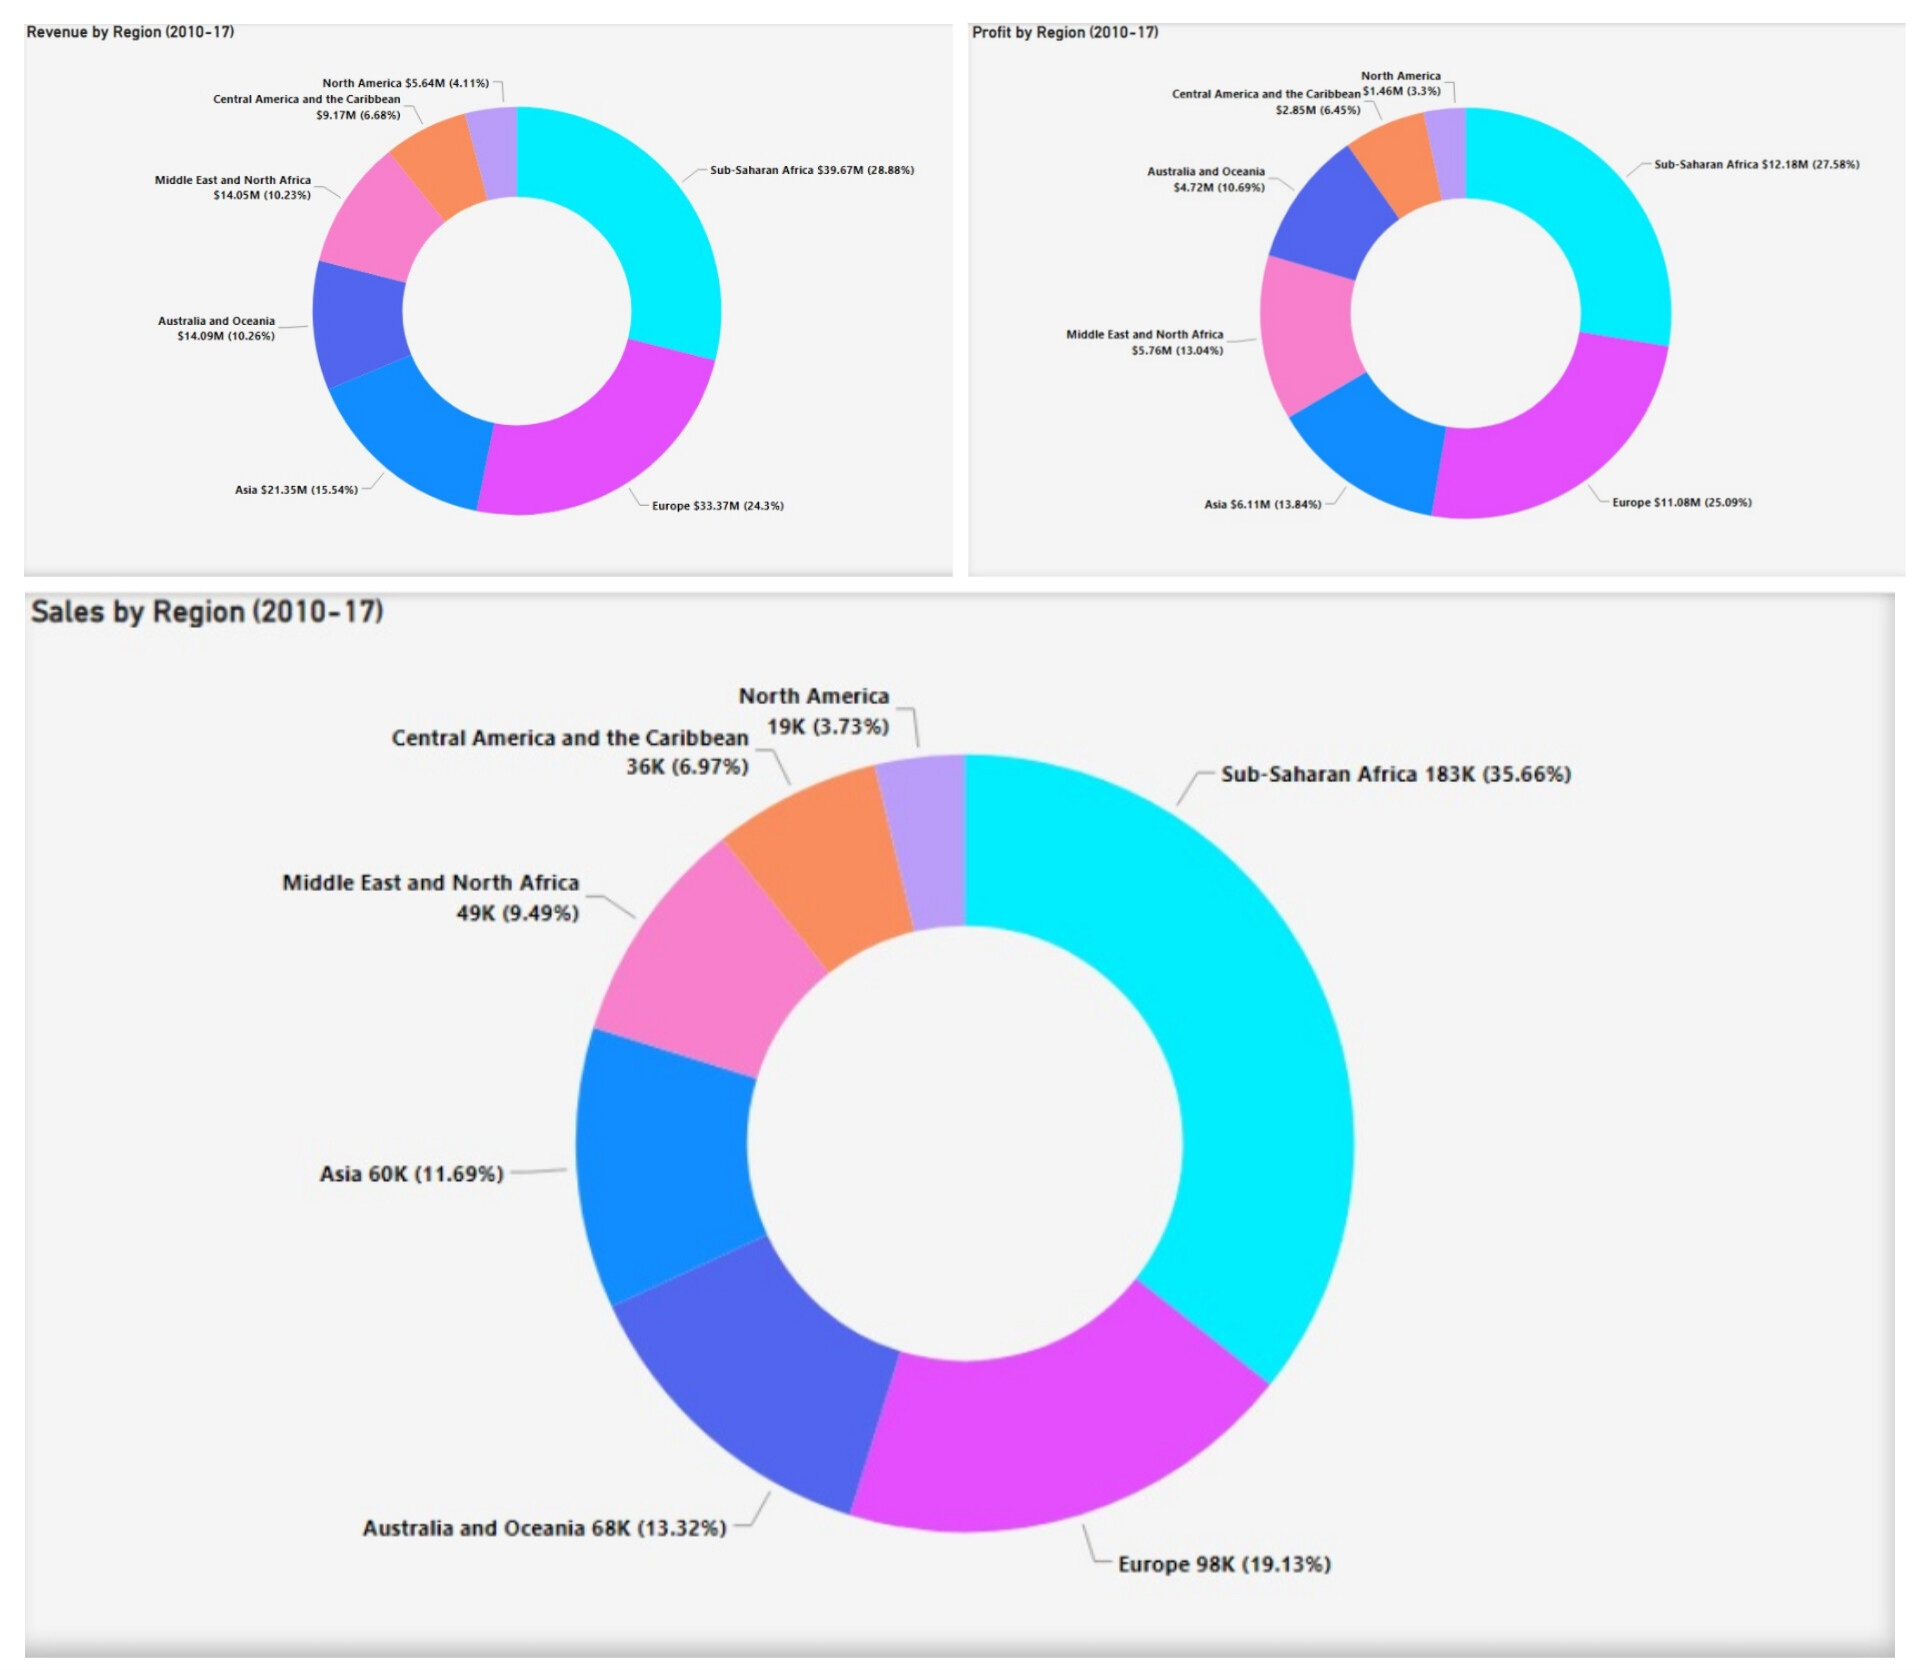

**~ Insights**

* The **Sub-Saharan Africa** region was the most sales, profitable, and revenue generated region, contributing:

**35.6%**  in total sales

**27.58%** in total profit

**28.88%** in total revenue

* The second most sales, profitable, and revenue generated region was Europe, which contributed:

**19.13%** in total sales

**25.09%** in total profit (fairly close to Sub-Saharan Africa)

**24.3%** in total revenue.

* **Europe** is the most Profitable region in terms of its sales.


# 4.3 Top 5 Most Profitable Product Segments and their Region (2010-17)

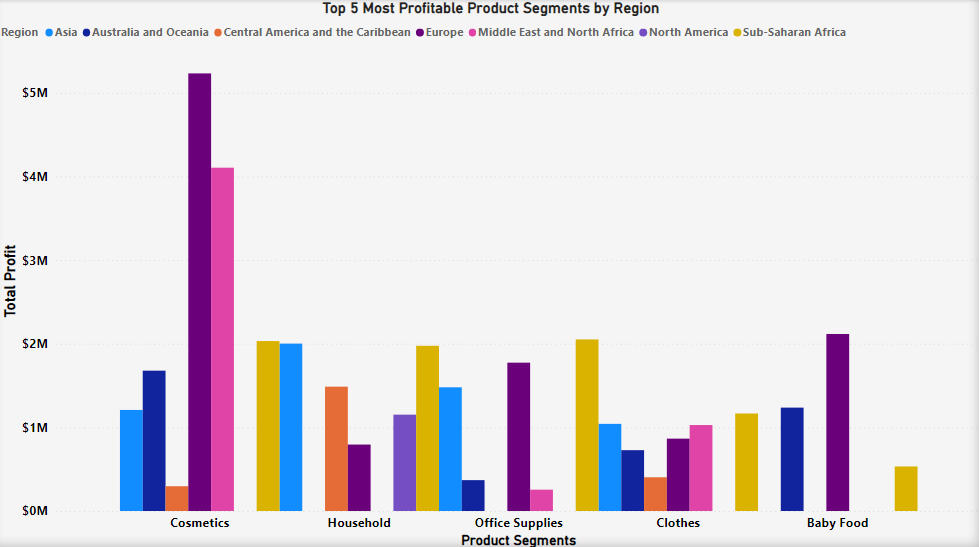

**~ Insights**
* Our top 5 most profitable product segments were Cosmetic, Household, Office Supplies, Clothes, and Baby Food.


* **Cosmetics** was the most profitable product segment, with its highest Profit generated in **Europe**, followed by the **Middle East and North Africa**


* **Europe** was the most profitable region for us because it purchased our highest profit margin products, such as cosmetics, office supplies, and baby food.




### 4.4 Total Monthly Revenue, Sales and Profit by Sales Channels (Online/Offline) (2010-17)

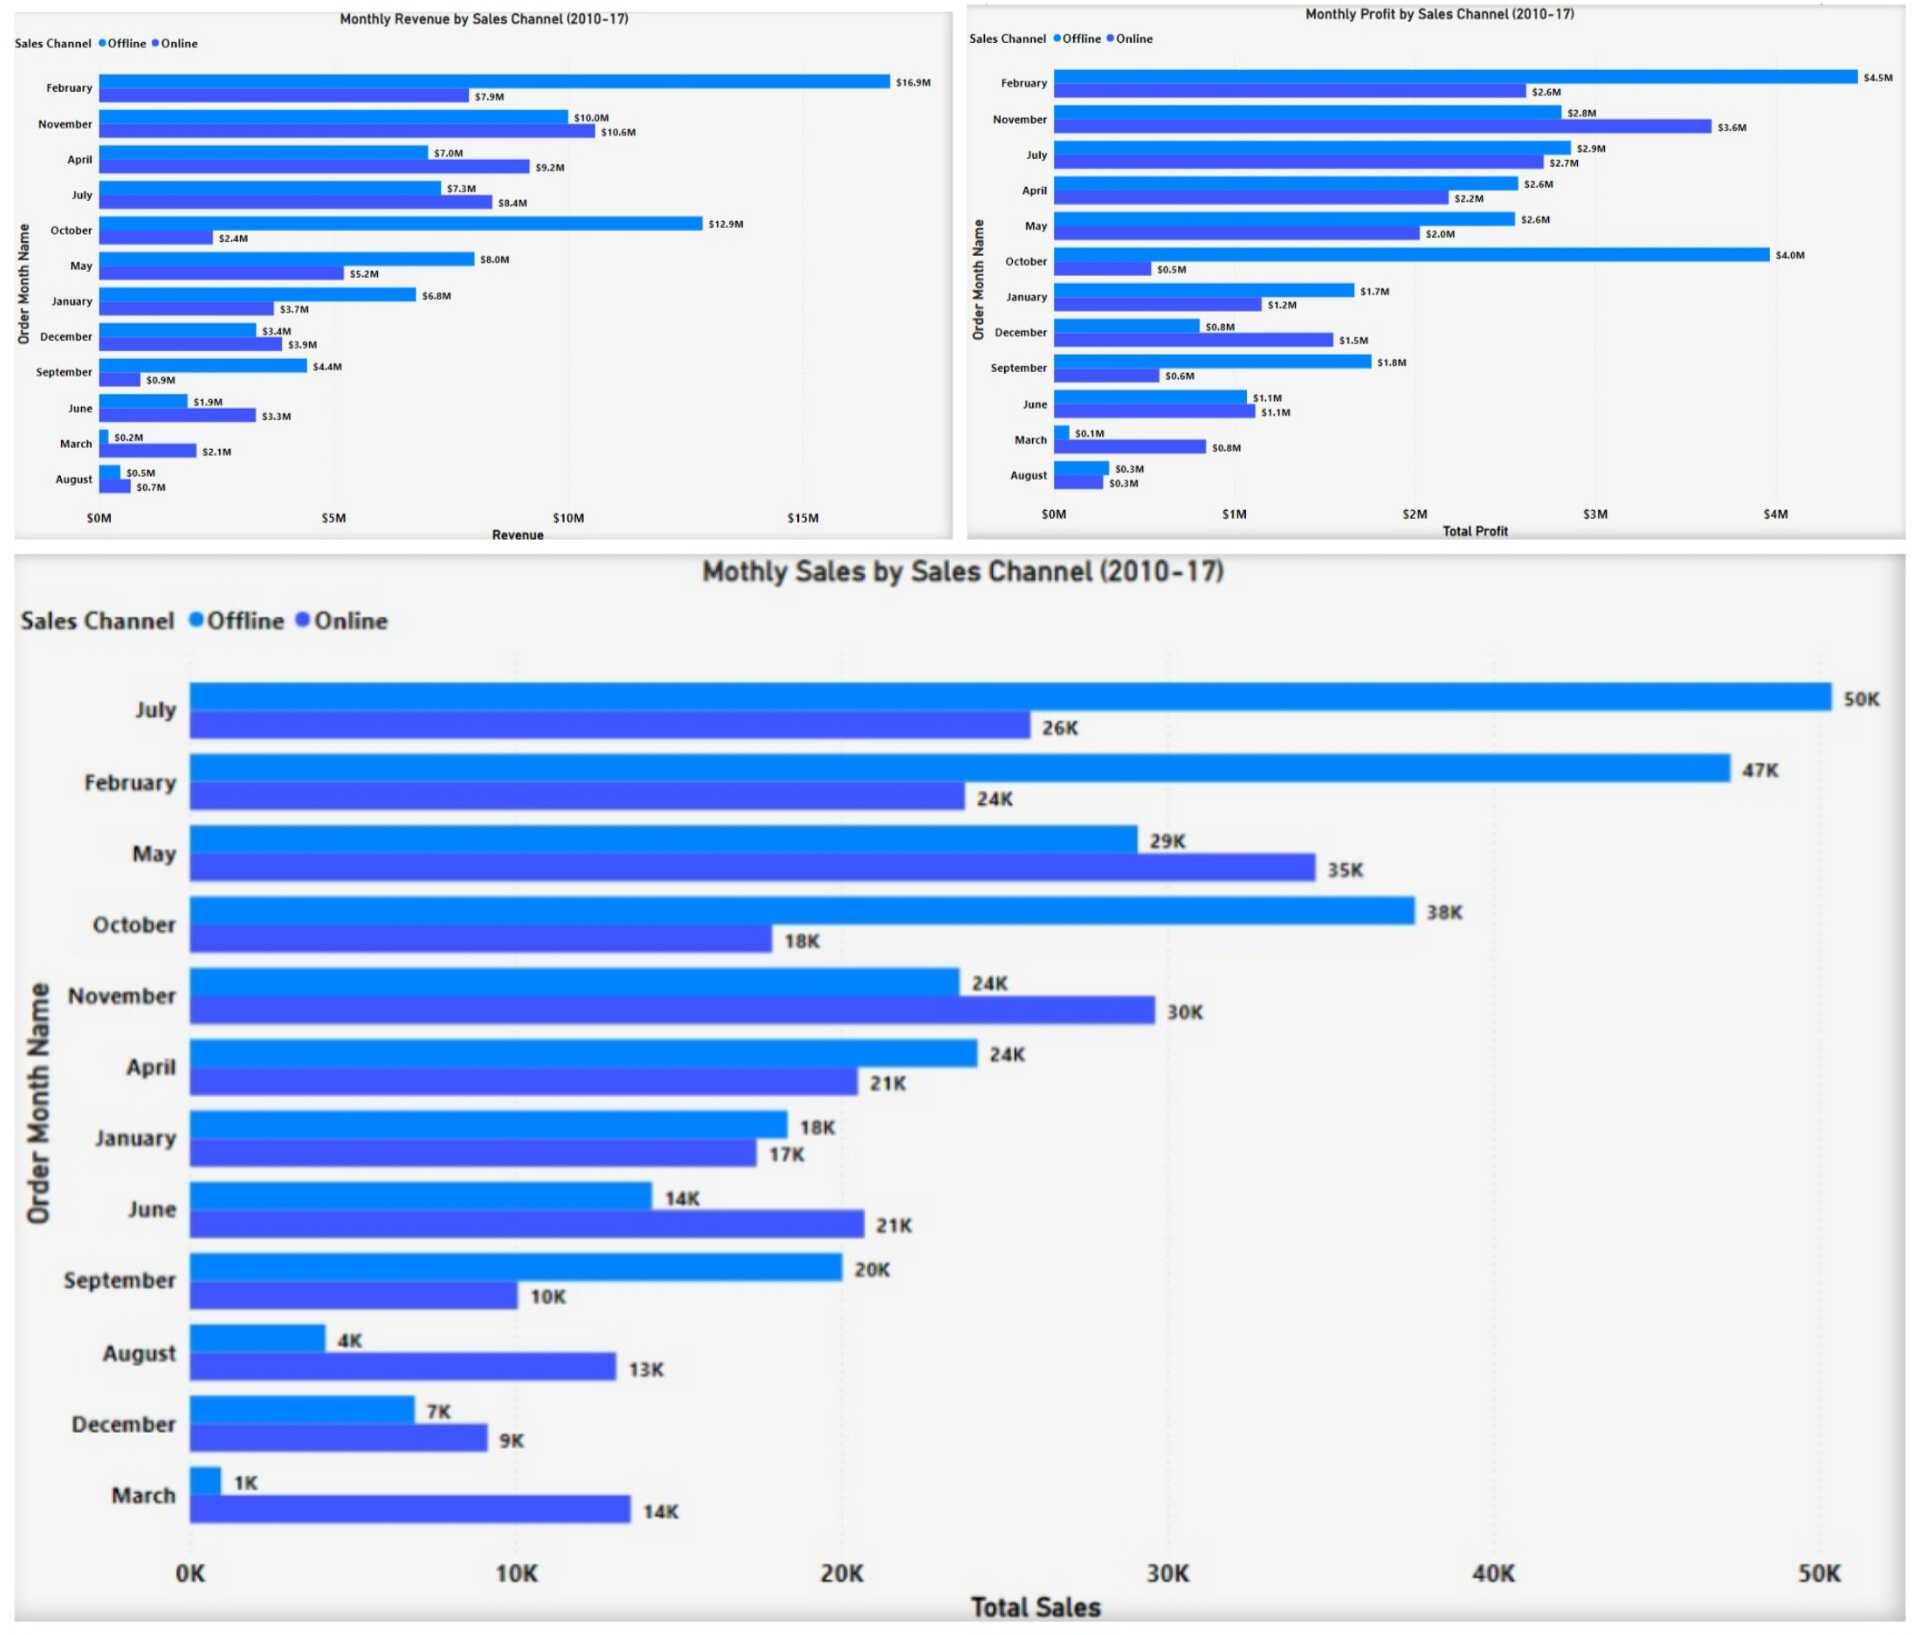

**~ Insights**

* **February** and **November** were the most profitable and revenue generated months.


* Although most of our profit, sales, and revenue come from offline channels, there are some months when users tend to purchase more online than offline. These months include **June**, **December**, and **November.**

## 5. Conclusion

* Our highest revenue and profit year was in 2012, but we experienced a decline from 2014-2017.

* Most of our profit, revenue, and sales come from offline channels.

* The Sub-Saharan Africa region was the most profitable and revenue generated region, followed by Europe.

* Cosmetics, Household, Office Supplies, Clothes, and Baby Food were our top 5 most profitable product segments.

* Europe was the most profitable region for us, due to high sales of cosmetics, office supplies, and baby food.

* February and November were the most profitable and revenue generated months.

* Online channels performed well in June, December, and November.

# 6. Recommendations

* We should find the reasons behind this decline after 2014 and take necessary steps in order to improve our Revenue, Sales and Profit.


* We should focus on optimizing our offline channel as it contributes the most to our profit, revenue, and sales.


* We should invest more in Sub-Saharan and European Region as it was our most revenue and profit generated regions.


* We should promote and expand in cosmetics, office supplies and baby food especially in Europe in order to gain more profit.


* We should give more discount offers, free home delivery and other offers to capture online market in the month of June, December and November.
